<a href="https://colab.research.google.com/github/FuturisticLover123/learning/blob/main/DataAnalys/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛБ04. Анализ распределения


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests
from scipy.stats import norm, lognorm, gamma, t, kstest, chisquare
from sklearn.mixture import GaussianMixture

## 0. Загрузка данных

#### Загрузка курса евро (EUR)

In [ ]:
curr_id=451
request = f'https://api.nbrb.by/ExRates/Rates/Dynamics/{curr_id}?startDate=2024-01-01&endDate=2024-12-31'
response = requests.get(request)
assert response != 200, f'ERROR: {response.status_code} - Запрос не выполнен!'
response.json()[:5]

[{'Cur_ID': 451, 'Date': '2024-01-01T00:00:00', 'Cur_OfficialRate': 3.5363},
 {'Cur_ID': 451, 'Date': '2024-01-02T00:00:00', 'Cur_OfficialRate': 3.5363},
 {'Cur_ID': 451, 'Date': '2024-01-03T00:00:00', 'Cur_OfficialRate': 3.5363},
 {'Cur_ID': 451, 'Date': '2024-01-04T00:00:00', 'Cur_OfficialRate': 3.4919},
 {'Cur_ID': 451, 'Date': '2024-01-05T00:00:00', 'Cur_OfficialRate': 3.5075}]

In [ ]:
eur = pd.read_json(response.text)
eur = eur.drop(['Cur_ID'], axis=1)
eur = eur.rename(columns={'Date':'date', 'Cur_OfficialRate':'eur'})
eur = eur.set_index(['date'])
eur

C:\Users\trxxnk\AppData\Local\Temp\ipykernel_12004\1265613904.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  eur = pd.read_json(response.text)


,eur
date,
2024-01-01,3.5363
2024-01-02,3.5363
2024-01-03,3.5363
2024-01-04,3.4919
2024-01-05,3.5075
...,...
2024-12-26,3.5558
2024-12-27,3.5429
2024-12-28,3.5429


#### Загрузка курса доллара (USD)

In [ ]:
curr_id=431
request = f'https://api.nbrb.by/ExRates/Rates/Dynamics/{curr_id}?startDate=2024-01-01&endDate=2024-12-31'
response = requests.get(request)
assert response != 200, f'ERROR: {response.status_code} - Запрос не выполнен!'
response.json()[:5]

[{'Cur_ID': 431, 'Date': '2024-01-01T00:00:00', 'Cur_OfficialRate': 3.1775},
 {'Cur_ID': 431, 'Date': '2024-01-02T00:00:00', 'Cur_OfficialRate': 3.1775},
 {'Cur_ID': 431, 'Date': '2024-01-03T00:00:00', 'Cur_OfficialRate': 3.1775},
 {'Cur_ID': 431, 'Date': '2024-01-04T00:00:00', 'Cur_OfficialRate': 3.1932},
 {'Cur_ID': 431, 'Date': '2024-01-05T00:00:00', 'Cur_OfficialRate': 3.198}]

In [ ]:
usd = pd.read_json(response.text)
usd = usd.drop(['Cur_ID'], axis=1)
usd = usd.rename(columns={'Date':'date', 'Cur_OfficialRate':'usd'})
usd = usd.set_index(['date'])
usd

C:\Users\trxxnk\AppData\Local\Temp\ipykernel_12004\424052010.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  usd = pd.read_json(response.text)


,usd
date,
2024-01-01,3.1775
2024-01-02,3.1775
2024-01-03,3.1775
2024-01-04,3.1932
2024-01-05,3.1980
...,...
2024-12-26,3.4216
2024-12-27,3.4070
2024-12-28,3.4070


## 1. Подготовка ряда

In [ ]:
# Ряд отношения курса доллара к евро
currency = pd.DataFrame(usd['usd'] / eur['eur'])
currency.columns = ['curr']
currency

,curr
date,
2024-01-01,0.898538
2024-01-02,0.898538
2024-01-03,0.898538
2024-01-04,0.914459
2024-01-05,0.911761
...,...
2024-12-26,0.962259
2024-12-27,0.961642
2024-12-28,0.961642


In [ ]:
# Разбиение ряда 60 на 40
train_size = int(len(currency) * 0.6)
train, test = currency[:train_size], currency[train_size:]

## 2. Построение гистограммы

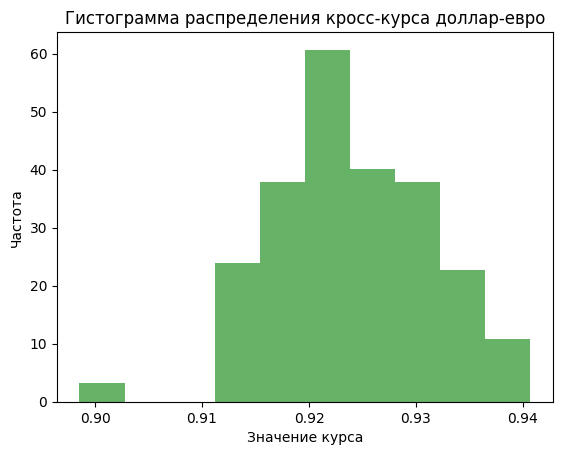

In [ ]:
plt.hist(train, bins=10, density=True, alpha=0.6, color='g')
plt.title('Гистограмма распределения кросс-курса доллар-евро')
plt.xlabel('Значение курса')
plt.ylabel('Частота')
plt.show()

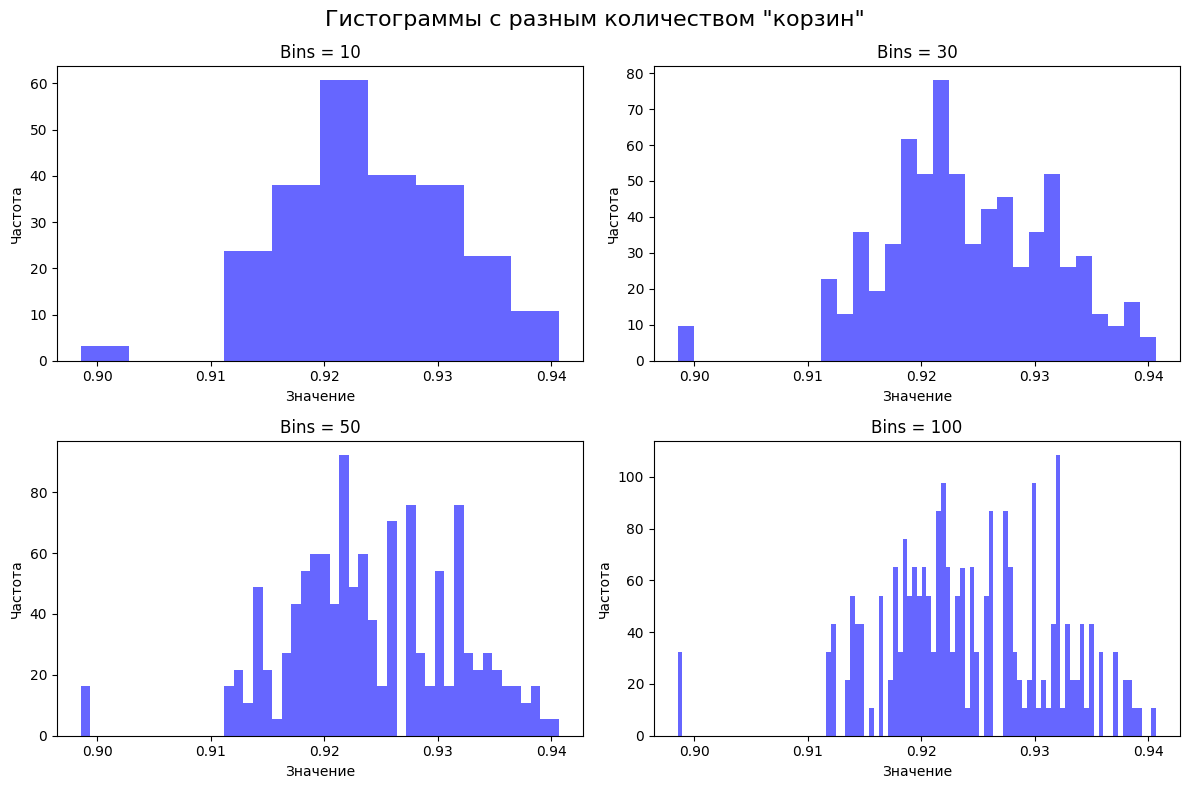

In [ ]:
# Создаем subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 строки, 2 столбца
fig.suptitle('Гистограммы с разным количеством "корзин"', fontsize=16)

# Параметры bins
bins_list = [10, 30, 50, 100]  # Разные значения для bins

# Построение гистограмм
for i, ax in enumerate(axes.flat):
    ax.hist(train, bins=bins_list[i], density=True, alpha=0.6, color='blue')
    ax.set_title(f'Bins = {bins_list[i]}')
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')

# Убираем лишние пробелы между графиками
plt.tight_layout()
plt.show()

## 3. Гипотезы распределения

### 1) Нормальное распределение (Гауссово)

**Формула плотности вероятности:**
$$
f(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$
где:
- $\mu$ — среднее (математическое ожидание),
- $\sigma$ — стандартное отклонение.

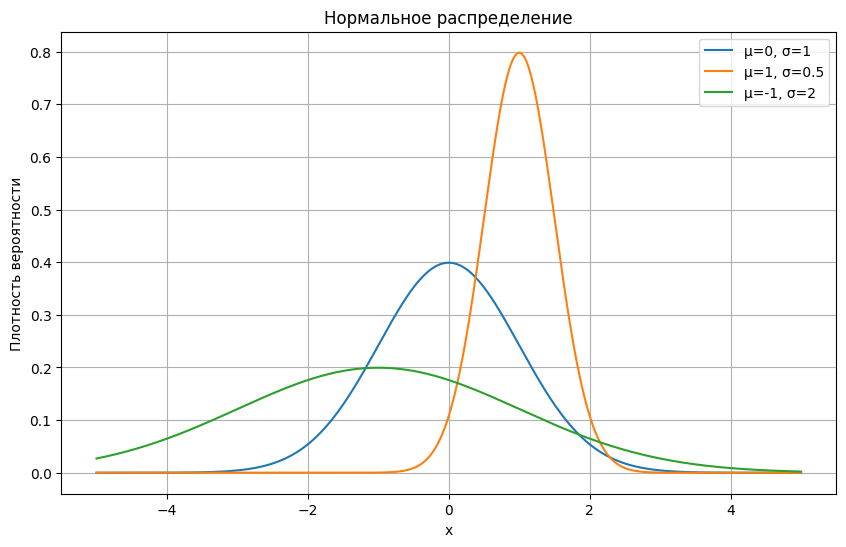

In [ ]:
# Параметры распределения
mu_values = [0, 1, -1]  # Разные средние
sigma_values = [1, 0.5, 2]  # Разные стандартные отклонения

x = np.linspace(-5, 5, 1000)

# Построение графиков
plt.figure(figsize=(10, 6))
for mu, sigma in zip(mu_values, sigma_values):
    plt.plot(x, norm.pdf(x, mu, sigma), label=f'μ={mu}, σ={sigma}')
plt.title('Нормальное распределение')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

### 2) Логнормальное распределение

**Формула плотности вероятности:**
$$
f(x | \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln x - \mu)^2}{2\sigma^2}\right)
$$
где:
- $\mu$ — среднее логарифма,
- $\sigma$ — стандартное отклонение логарифма.

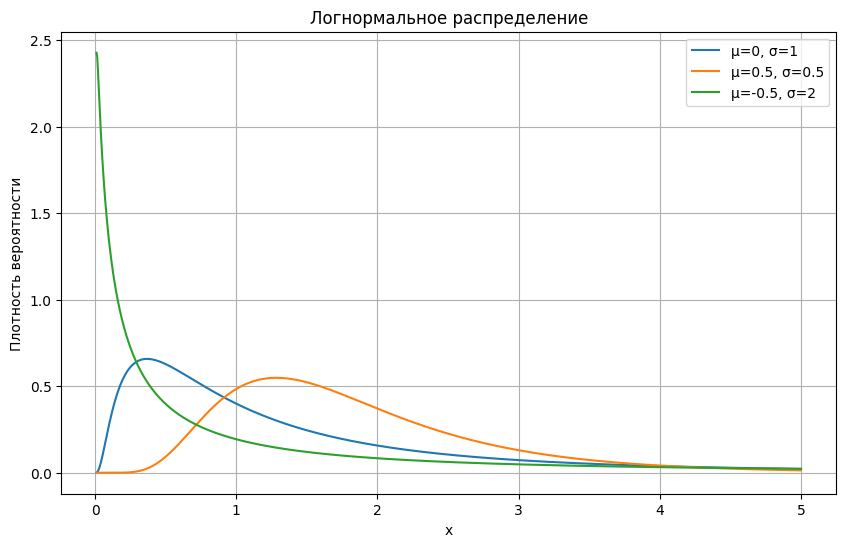

In [ ]:
# Параметры распределения
mu_values = [0, 0.5, -0.5]  # Разные средние логарифма
sigma_values = [1, 0.5, 2]  # Разные стандартные отклонения логарифма

x = np.linspace(0.01, 5, 1000)

# Построение графиков
plt.figure(figsize=(10, 6))
for mu, sigma in zip(mu_values, sigma_values):
    s = sigma  # Параметр формы
    scale = np.exp(mu)  # Параметр масштаба
    plt.plot(x, lognorm.pdf(x, s, scale=scale), label=f'μ={mu}, σ={sigma}')
plt.title('Логнормальное распределение')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

### 3) Гамма-распределение

**Формула плотности вероятности:**
$$
f(x | k, \theta) = \frac{x^{k-1} \exp\left(-\frac{x}{\theta}\right)}{\theta^k \Gamma(k)}
$$
где:
- $k$ — параметр формы (shape),
- $\theta$ — параметр масштаба (scale),
- $\Gamma(k)$ — гамма-функция.

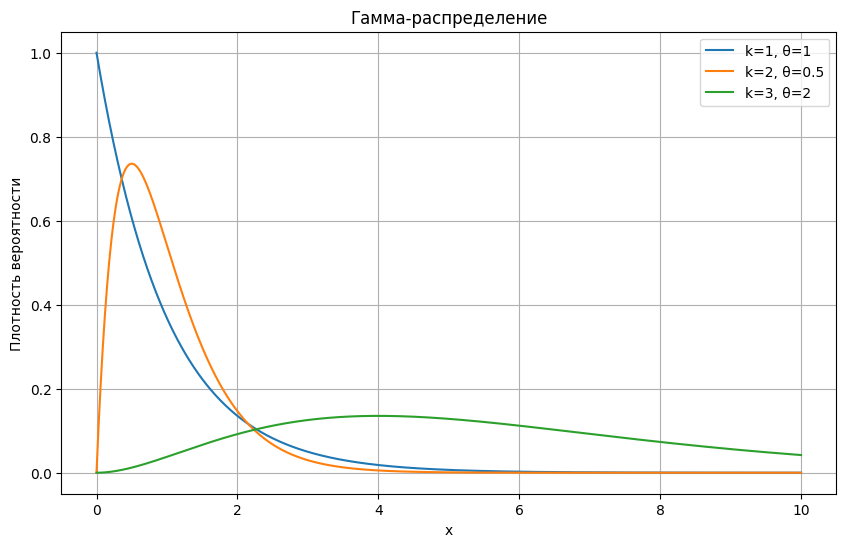

In [ ]:
# Параметры распределения
k_values = [1, 2, 3]  # Разные параметры формы
theta_values = [1, 0.5, 2]  # Разные параметры масштаба

x = np.linspace(0, 10, 1000)

# Построение графиков
plt.figure(figsize=(10, 6))
for k, theta in zip(k_values, theta_values):
    plt.plot(x, gamma.pdf(x, k, scale=theta), label=f'k={k}, θ={theta}')
plt.title('Гамма-распределение')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

### 4) Распределение Стьюдента (t-распределение)

**Формула плотности вероятности:**
$$
f(x | \nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi} \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$
где:
- $\nu$ — количество степеней свободы.

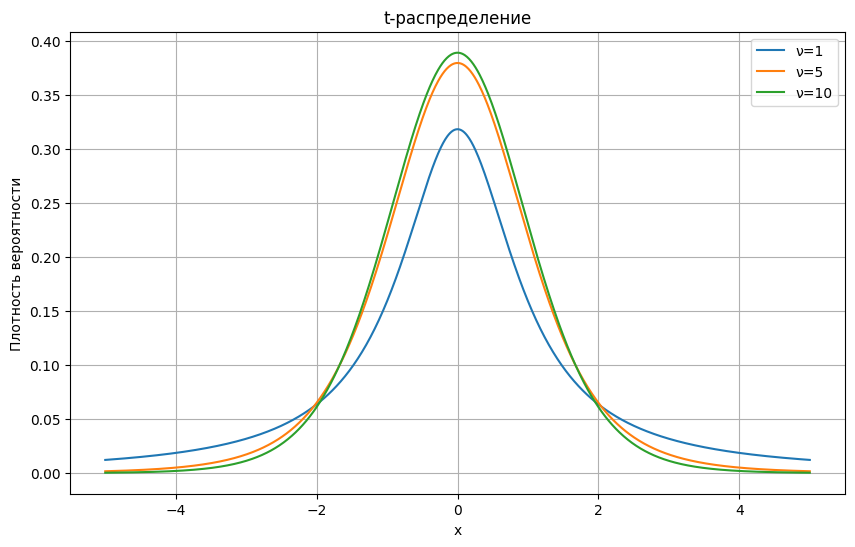

In [ ]:
# Параметры распределения
nu_values = [1, 5, 10]  # Разные степени свободы

x = np.linspace(-5, 5, 1000)

# Построение графиков
plt.figure(figsize=(10, 6))
for nu in nu_values:
    plt.plot(x, t.pdf(x, nu), label=f'ν={nu}')
plt.title('t-распределение')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

## 4. Подбор распредления

### Метод максимального правдоподобия (MLE)

In [ ]:
# Пример для нормального распределения
params_norm = norm.fit(train)
print("Нормальное распределение: mu =", params_norm[0], ", sigma =", params_norm[1])

# Пример для гамма-распределения
params_gamma = gamma.fit(train)
print("Гамма-распределение: shape =", params_gamma[0], ", scale =", params_gamma[2])

Нормальное распределение: mu = 0.9241337364564276 , sigma = 0.007424304617425804
Гамма-распределение: shape = 363.88956566973945 , scale = 0.00039359583513598863


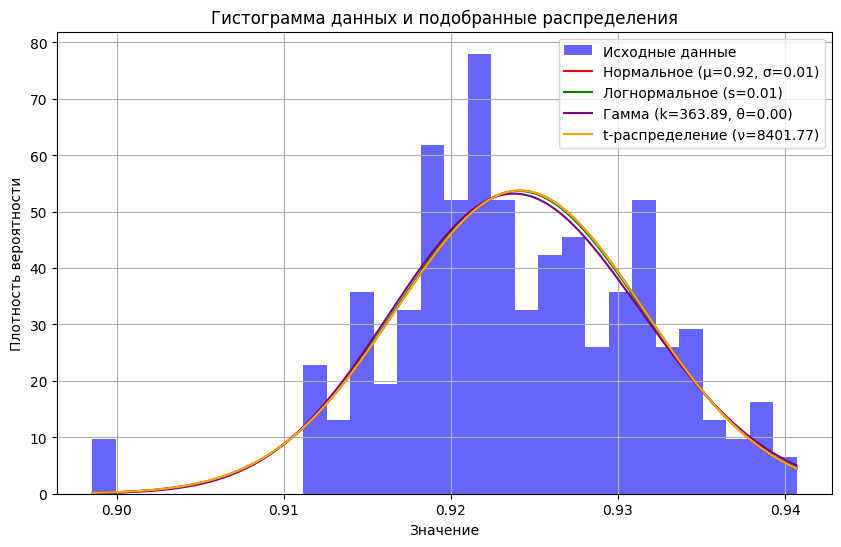

In [ ]:
# Пример данных (замените на ваш временной ряд)
# data = np.random.normal(10, 2, 1000)  # Нормальное распределение для примера
data = train['curr'].values

# Построение гистограммы исходных данных
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Исходные данные')

# Подбор и отображение распределений
x = np.linspace(min(data), max(data), 1000)  # Ось X для графиков распределений

# 1. Нормальное распределение
params_norm = norm.fit(data)  # Подбор параметров
plt.plot(x, norm.pdf(x, *params_norm), label=f'Нормальное (μ={params_norm[0]:.2f}, σ={params_norm[1]:.2f})', color='red')

# 2. Логнормальное распределение
params_lognorm = lognorm.fit(data, floc=0)  # Подбор параметров
plt.plot(x, lognorm.pdf(x, *params_lognorm), label=f'Логнормальное (s={params_lognorm[0]:.2f})', color='green')

# 3. Гамма-распределение
params_gamma = gamma.fit(data)  # Подбор параметров
plt.plot(x, gamma.pdf(x, *params_gamma), label=f'Гамма (k={params_gamma[0]:.2f}, θ={params_gamma[2]:.2f})', color='purple')

# 4. t-распределение
params_t = t.fit(data)  # Подбор параметров
plt.plot(x, t.pdf(x, *params_t), label=f't-распределение (ν={params_t[0]:.2f})', color='orange')

# Настройка графика
plt.title('Гистограмма данных и подобранные распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

## 5. Критерии согласия

In [ ]:
# Пример данных (замените на ваш временной ряд)
data = np.random.normal(0, 1, 1000)  # Нормальное распределение для примера

# Подбор нормального распределения
params_norm = norm.fit(data)

# Построение гистограммы
observed_frequencies, bin_edges = np.histogram(data, bins=30, density=False)

# Вычисление ожидаемых частот для нормального распределения
cdf_values = norm.cdf(bin_edges, *params_norm)  # Значения CDF на границах бинов
expected_frequencies = np.diff(cdf_values) * len(data)  # Ожидаемые частоты

# Нормализация ожидаемых частот, чтобы их сумма совпадала с суммой observed_frequencies
expected_frequencies = expected_frequencies * (np.sum(observed_frequencies) / np.sum(expected_frequencies))

# Убедимся, что длины массивов совпадают
if len(observed_frequencies) == len(expected_frequencies):
    # Хи-квадрат тест
    chi_stat, chi_pvalue = chisquare(observed_frequencies, expected_frequencies)
    print(f"Хи-квадрат тест: stat={chi_stat:.4f}, p-value={chi_pvalue:.4f}")

    # Интерпретация
    if chi_pvalue > 0.05:
        print("Нулевая гипотеза не отвергается: данные соответствуют нормальному распределению.")
    else:
        print("Нулевая гипотеза отвергается: данные не соответствуют нормальному распределению.")
else:
    print("Ошибка: длины observed_frequencies и expected_frequencies не совпадают.")

Хи-квадрат тест: stat=34.9207, p-value=0.2072
Нулевая гипотеза не отвергается: данные соответствуют нормальному распределению.


## 6. Смесь гауссовских распределений (GMM)

In [ ]:
# Преобразуем данные в 2D массив
train_2d = train.values.reshape(-1, 1)

# Подбор модели
gmm = GaussianMixture(n_components=2)  # Выберите количество компонент
gmm.fit(train_2d)

# Оценка параметров
print("Средние компонент:", gmm.means_)
print("Ковариации:", gmm.covariances_)

Средние компонент: [[0.9205982 ]
 [0.93081703]]
Ковариации: [[[3.70241592e-05]]

 [[2.39227322e-05]]]


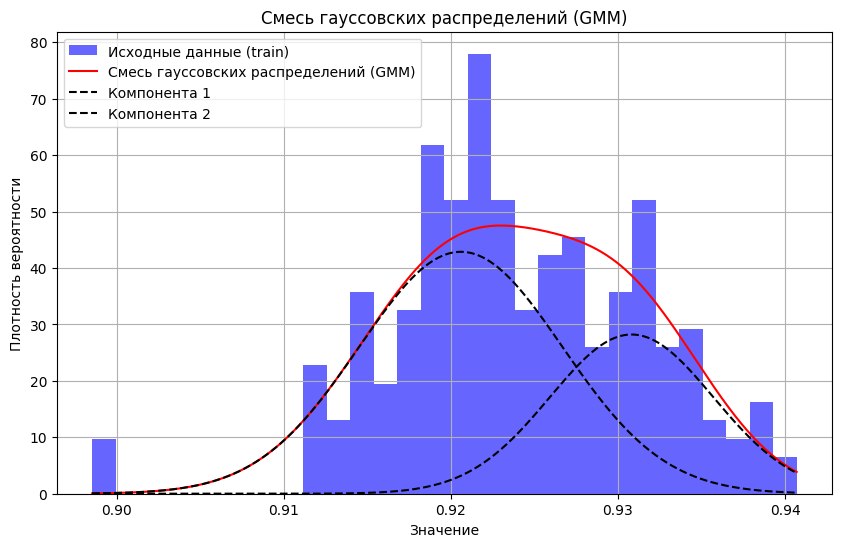

In [ ]:
# Пример данных (замените на ваш временной ряд)
# np.random.seed(42)
# data = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(5, 1, 500)])  # Смесь двух нормальных распределений

# Данные временного ряда
data = train['curr'].values
data = data.reshape(-1, 1)  # Преобразуем в 2D массив для GMM


# Подбор смеси гауссовских распределений (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)  # Выберите количество компонент
gmm.fit(data)

# Генерация точек для визуализации
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)

# Вычисление плотности смеси распределений
logprob = gmm.score_samples(x)  # Логарифм плотности
pdf = np.exp(logprob)  # Плотность вероятности

# Визуализация
plt.figure(figsize=(10, 6))

# Гистограмма исходных данных
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Исходные данные (train)')

# График плотности смеси распределений
plt.plot(x, pdf, 'r-', label='Смесь гауссовских распределений (GMM)')

# Графики отдельных компонент GMM
for i in range(gmm.n_components):
    mean = gmm.means_[i][0]
    variance = np.sqrt(gmm.covariances_[i][0][0])
    weight = gmm.weights_[i]
    plt.plot(x, weight * norm.pdf(x, mean, variance), 'k--', label=f'Компонента {i+1}')

# Настройка графика
plt.title('Смесь гауссовских распределений (GMM)')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()